In [223]:
#데이터 로드
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = "./heart.csv"
df = pd.read_csv(file_path)

In [225]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [227]:
from sklearn.model_selection import train_test_split

import seaborn as sns

In [229]:
# 특성(X)과 타겟(y) 데이터 정의
X = df.drop(columns=['target'], axis = 1) 
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [233]:
# 타겟 원핫 인코딩
y_train_encoded = to_categorical(y_train)

Accuracy: 0.8689
최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 400}
최고 정확도: 0.8181122448979593
튜닝 후 정확도: 0.8524590163934426
Confusion Matrix:
[[24  5]
 [ 3 29]]
Confusion Matrix (튜닝 후):
[[24  5]
 [ 4 28]]
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5889 - loss: 0.6532 - val_accuracy: 0.6939 - val_loss: 0.5958
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7243 - loss: 0.5798 - val_accuracy: 0.7347 - val_loss: 0.5471
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.5193 - val_accuracy: 0.7347 - val_loss: 0.5113
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.4989 - val_accuracy: 0.7347 - val_loss: 0.4810
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.4599 - val_accuracy: 0.7347 - val_loss: 0.4555
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8246 - loss: 0.4310 - val_accuracy: 0.7347 - val_loss: 0.4373
Epoch 7/20
7/7 ━━━━━━━━━━━

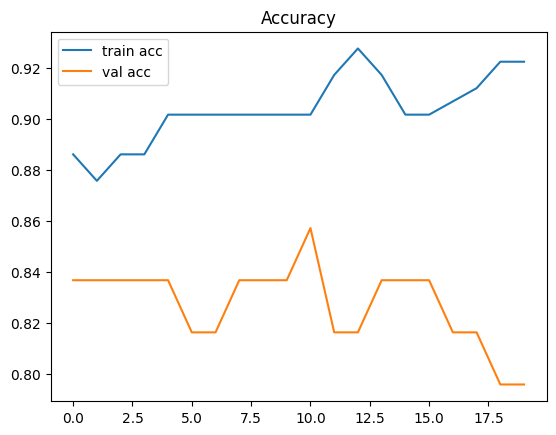

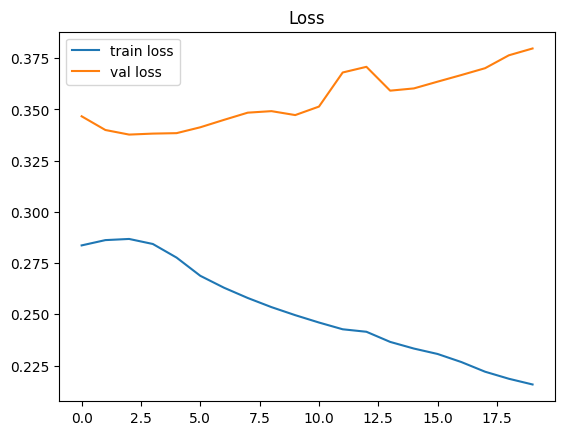

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 모델 학습
model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

Accuracy: 0.8197
최적 하이퍼파라미터: {'max_depth': 6, 'min_samples_split': 9}
최고 정확도: 0.7562925170068028
튜닝 후 정확도: 0.8524590163934426
Confusion Matrix:
[[23  6]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[24  5]
 [ 4 28]]
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4893 - loss: 0.7398 - val_accuracy: 0.6327 - val_loss: 0.6467
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6387 - loss: 0.6189 - val_accuracy: 0.7143 - val_loss: 0.5883
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7315 - loss: 0.5731 - val_accuracy: 0.7347 - val_loss: 0.5482
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.5150 - val_accuracy: 0.7755 - val_loss: 0.5168
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4952 - val_accuracy: 0.7755 - val_loss: 0.4943
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.4588 - val_accuracy: 0.7755 - val_loss: 0.4744
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

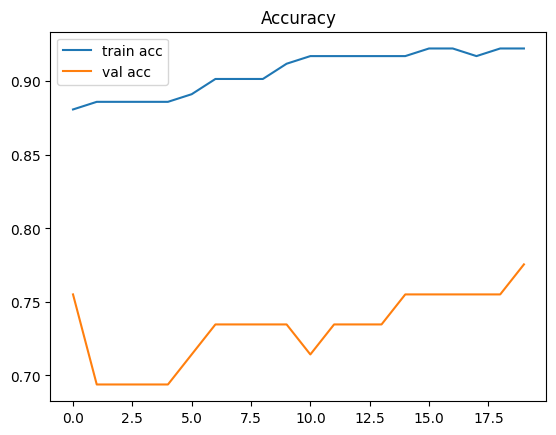

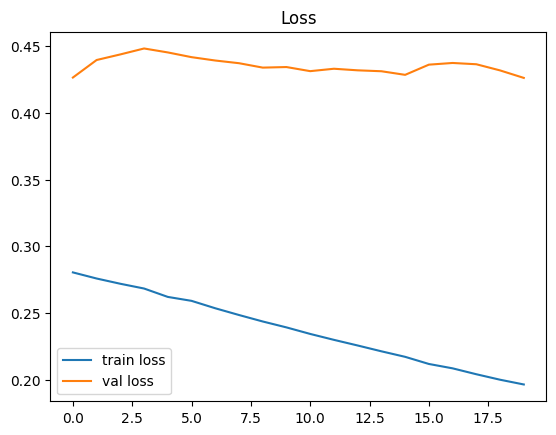

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = DecisionTreeClassifier(max_depth = 3, random_state=42)

# X_train을 DataFrame으로 유지
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 모델 학습
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_depth': randint(3, 10), 'min_samples_split': randint(2, 10)}

random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring="accuracy")
random_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", random_search.best_params_)
print("최고 정확도:", random_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

Accuracy: 0.8689
최적 하이퍼파라미터: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
최고 정확도: 0.8224489795918368
튜닝 후 정확도: 0.8688524590163934
Confusion Matrix:
[[26  3]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[26  3]
 [ 5 27]]
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4459 - loss: 0.7553 - val_accuracy: 0.5510 - val_loss: 0.6734
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.6316 - val_accuracy: 0.7143 - val_loss: 0.5974
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.5673 - val_accuracy: 0.7551 - val_loss: 0.5560
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.5404 - val_accuracy: 0.7755 - val_loss: 0.5295
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.4818 - val_accuracy: 0.7551 - val_loss: 0.5036
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.4514 - val_accuracy: 0.7755 - val_loss: 0.4819
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

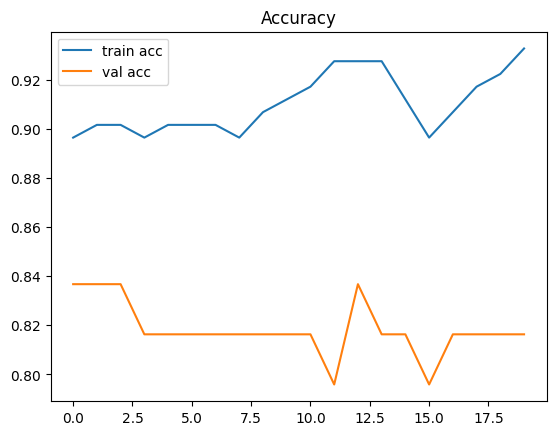

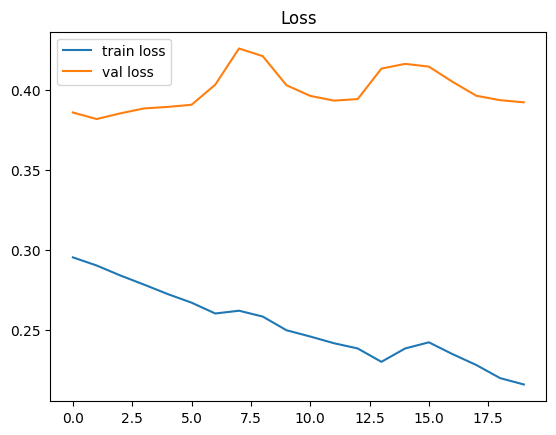

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# StandardScaler 객체 정의
scaler = StandardScaler()

# X_train을 DataFrame으로 유지
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# SVC 모델 학습
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))


# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

Accuracy: 0.8525
최적 하이퍼파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
최고 정확도: 0.8221088435374149
튜닝 후 정확도: 0.8524590163934426
Confusion Matrix:
[[25  4]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[25  4]
 [ 5 27]]
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4147 - loss: 0.7257 - val_accuracy: 0.5714 - val_loss: 0.6698
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6331 - loss: 0.6526 - val_accuracy: 0.7347 - val_loss: 0.6153
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7957 - loss: 0.5840 - val_accuracy: 0.7347 - val_loss: 0.5783
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7636 - loss: 0.5556 - val_accuracy: 0.7551 - val_loss: 0.5497
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7919 - loss: 0.5210 - val_accuracy: 0.7959 - val_loss: 0.5246
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8132 - loss: 0.4814 - val_accuracy: 0.7959 - val_loss: 0.5127
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3

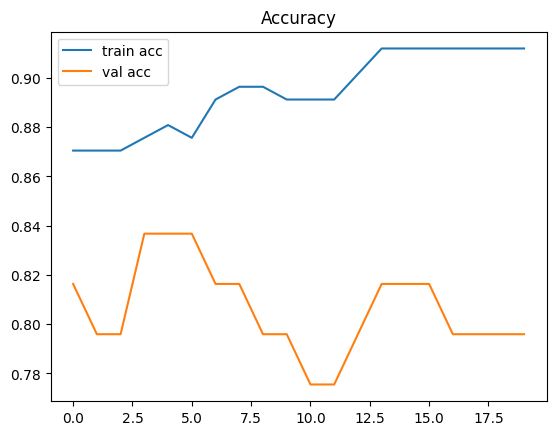

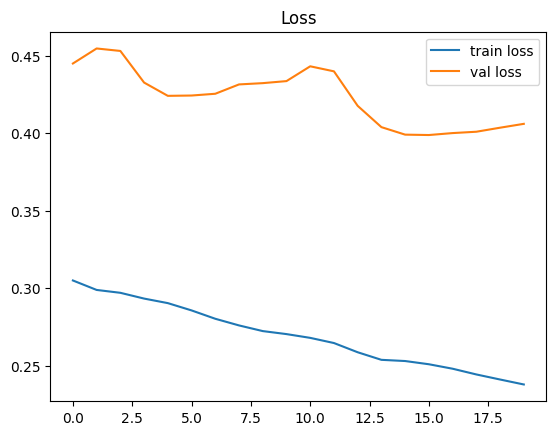

In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 로지스틱 회귀 모델 학습 (max_iter 늘리고, solver 변경)
model = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 하이퍼파라미터 튜닝: 'solver'와 'penalty' 조건을 맞추기 위해 필터링
from sklearn.model_selection import GridSearchCV
param_grid = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']}, {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}]

# GridSearchCV로 최적화
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

#하이퍼 파라미터 튜닝 후 정확도
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()